In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.3.0


In [1]:
#Loading Libraries
import tensorflow as tf                       # deep learning library
import numpy as np                            # for matrix operations
import matplotlib.pyplot as plt               # for visualization
%matplotlib inline

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data  # To load the  dataset
(x_train, y_train), (_, __) = load_data()                # Loading data

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
import pandas as pd
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")

In [5]:
#Basic EDA
print("There are ", len(x_train), "images in the training dataset")     # checking total number of records / data points available in the X_train dataset
print("There are ", len(test_data), "images in the test dataset")     # checking total number of records / data points available in the X_test dataset

There are  50000 images in the training dataset
There are  2000 images in the test dataset


In [6]:
# Checking the shape of one image
x_train[0].shape

(32, 32, 3)

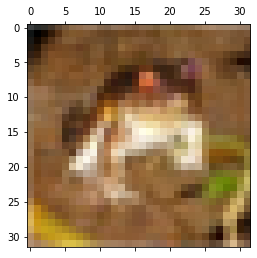

In [7]:
#Visual of the first image
plt.matshow(x_train[0])

In [8]:
# we can use y_train to cross check
y_train[0]

array([6], dtype=uint8)

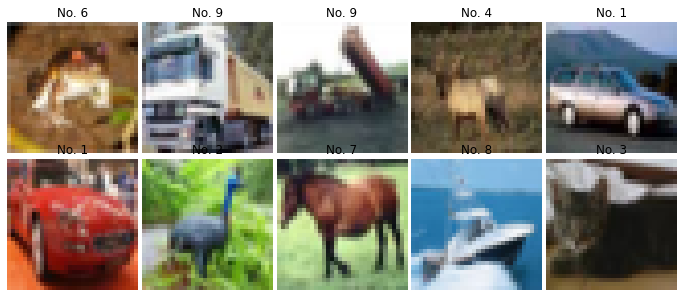

In [9]:
# code to view the images
num_rows, num_cols = 2, 5
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( x_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

In [10]:
# Normalization
X_train = x_train / 255
test_data = test_data / 255

In [11]:
#Checking the shape of training set
X_train.shape

(50000, 32, 32, 3)

In [12]:
#Flattening the training set 
X_train_flattened = X_train.reshape(len(X_train), 32*32*3)    # converting our 3D array representin an image to one dimensional

In [13]:
#Shape of flattened training set
X_train_flattened.shape

(50000, 3072)

In [181]:
# Defining the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(3072,), activation='swish'),
    tf.keras.layers.Dense(128, input_shape=(128,),activation='swish'),
    tf.keras.layers.Dense(128, input_shape=(128,),activation='swish'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 128)               393344    
_________________________________________________________________
dense_116 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_117 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_118 (Dense)            (None, 10)                1290      
Total params: 427,658
Trainable params: 427,658
Non-trainable params: 0
_________________________________________________________________


In [182]:
#Compiling the model
model.compile(optimizer= 'adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [183]:
#Fitting the model
model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8488 - accuracy: 0.3215
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6516 - accuracy: 0.4029
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5712 - accuracy: 0.4331
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5179 - accuracy: 0.4521
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4755 - accuracy: 0.4680
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4455 - accuracy: 0.4770
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4122 - accuracy: 0.4928
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3901 - accuracy: 0.4982
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3675 - accuracy: 0.5053
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.344

In [184]:
#Predicting the  probability values of y 
y_predicted = model.predict(test_data)

In [185]:
#Predicting the  classification values of test dataset 
t=[]
for i in range(0,len(test_data)):
  t.append(np.argmax(y_predicted[i]))

In [186]:
# SAVING THE PREDICTION VARIABLE
# To create Dataframe of predicted value with particular respective index
target = pd.DataFrame(t) 

# To download the csv file locally
from google.colab import files
target.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>